<a href="https://colab.research.google.com/github/AliAlBadra/KerasTFImageClassificationCNN/blob/main/MalariaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Malarlia Dataset Image Classification CNN Model**

Tutorials followed: 
  1. https://www.kaggle.com/amyjang/tensorflow-image-classification-with-malaria-tfds
  2. https://github.com/KeithGalli/neural-nets/blob/master/real_world_example.ipynb

Dataset:
  1. https://www.tensorflow.org/datasets/catalog/malaria

## Import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

##Get Dataset

In [4]:
builder = tfds.builder("malaria")
info = builder.info
info

tfds.core.DatasetInfo(
    name='malaria',
    version=1.0.0,
    description='The Malaria dataset contains a total of 27,558 cell images
with equal instances of parasitized and uninfected cells from the thin blood 
smear slide images of segmented cells.',
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=27558,
    splits={
        'train': 27558,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear images},
      author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh
      and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger, 
      Stefan and Thoma, George R}

## Split dataset into test / train

In [20]:
ds, info = tfds.load('malaria', split='train', shuffle_files=True, with_info=True, batch_size=32)

ValueError: ignored

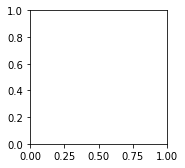

In [5]:
#tfds.show_examples(ds, info)

In [7]:
print("Num classes: " + str(info.features['label'].num_classes))
print("Class names: " + str(info.features['label'].names)) 

Num classes: 2
Class names: ['parasitized', 'uninfected']


## Data Prep

In [8]:
train_images = []
train_labels = []

for example in ds:
  train_images.append(example['image'].numpy())
  train_labels.append(example['label'].numpy())

In [9]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
#train_images = np.array([example['image'].numpy() for example in ds_train])
#train_labels = np.array([example['label'].numpy() for example in ds_train])

#test_images = np.array([example['image'].numpy() for example in ds_test])
#test_labels = np.array([example['label'].numpy() for example in ds_test])

In [10]:
images_flattened = [x.flatten().astype('float64') for x in train_images]

In [11]:
img_lengths = []
for img in images_flattened:
    img_lengths.append(len(img))

In [12]:
img_lengths = np.array(img_lengths)

In [14]:
uninfected_lengths = img_lengths[train_labels == 1]
parasitized_lengths = img_lengths[train_labels == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


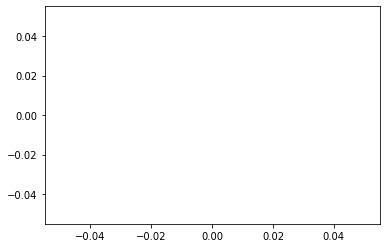

In [16]:
plt.scatter(np.arange(len(uninfected_lengths)), uninfected_lengths)

In [18]:
np.unique(uninfected_lengths)

array([], dtype=int64)

In [19]:
del ds
del info
del train_images
del train_labels
del images_flattened
del img_lengths

## Model Building

In [22]:
BATCH_SIZE = 32
IMAGE_SIZE = [200, 200]

train_ds, val_ds, test_ds = tfds.load('malaria',
                                      split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
                                      shuffle_files=True, as_supervised=True)

In [23]:
NUM_TRAIN_IMAGES = tf.data.experimental.cardinality(train_ds).numpy()
print("Num training images: " + str(NUM_TRAIN_IMAGES))

NUM_VAL_IMAGES = tf.data.experimental.cardinality(val_ds).numpy()
print("Num validating images: " + str(NUM_VAL_IMAGES))

NUM_TEST_IMAGES = tf.data.experimental.cardinality(test_ds).numpy()
print("Num testing images: " + str(NUM_TEST_IMAGES))

Num training images: 19291
Num validating images: 4133
Num testing images: 4134


## Reshape Images

In [24]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (103, 103, 3)
Label:  1


In [25]:
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

def pad(image,label):
  image,label = convert(image, label)
  image = tf.image.resize_with_crop_or_pad(image, 200, 200)
  return image,label

In [26]:
padded_train_ds = (
    train_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

padded_val_ds = (
    val_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

## Visualize passed images

In [27]:
image_batch, label_batch = next(iter(padded_train_ds))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("uninfected")
        else:
            plt.title("parasitized")
        plt.axis("off")

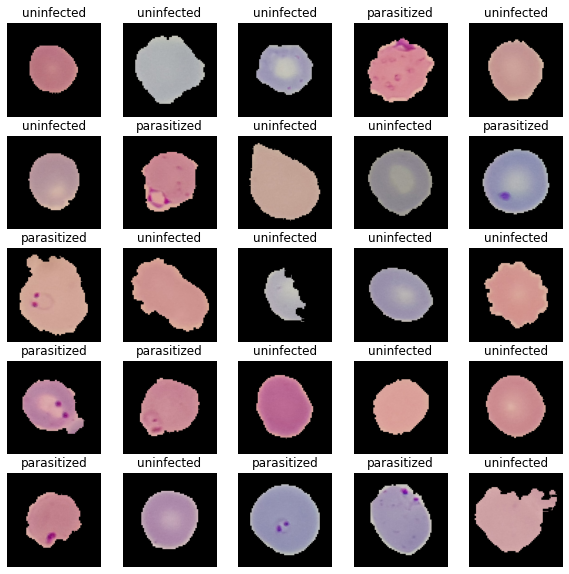

In [28]:
show_batch(image_batch.numpy(), label_batch.numpy())

## Build Model

In [29]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [30]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## Compile Model

In [31]:
model = build_model()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=tf.keras.metrics.AUC(name='auc')
)

In [32]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("malaria_model.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

## Training

In [33]:
history = model.fit(
    padded_train_ds, epochs=20,
    validation_data=padded_val_ds,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/20
603/603 [==============================] - 152s 224ms/step - loss: 0.6688 - auc: 0.6541 - val_loss: 2.6968 - val_auc: 0.6346 - lr: 0.0100
Epoch 2/20
603/603 [==============================] - 131s 217ms/step - loss: 0.6407 - auc: 0.6847 - val_loss: 0.7109 - val_auc: 0.5750 - lr: 0.0089
Epoch 3/20
603/603 [==============================] - 136s 226ms/step - loss: 0.6365 - auc: 0.6931 - val_loss: 0.7349 - val_auc: 0.6703 - lr: 0.0079
Epoch 4/20
603/603 [==============================] - 131s 217ms/step - loss: 0.6101 - auc: 0.7294 - val_loss: 0.8049 - val_auc: 0.7578 - lr: 0.0071
Epoch 5/20
603/603 [==============================] - 136s 225ms/step - loss: 0.3156 - auc: 0.9372 - val_loss: 0.3440 - val_auc: 0.9657 - lr: 0.0063
Epoch 6/20
603/603 [==============================] - 131s 217ms/step - loss: 0.1786 - auc: 0.9724 - val_loss: 0.1286 - val_auc: 0.9891 - lr: 0.0056
Epoch 7/20
603/603 [==============================] - 130s 216ms/step - loss: 0.1621 - auc: 0.9778 - val_l

##Evaluate Model

In [34]:
padded_test_ds = (
     test_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

In [35]:
model.evaluate(padded_test_ds)

130/130 [==============================] - 14s 102ms/step - loss: 0.1207 - auc: 0.9896


[0.12068846076726913, 0.989554226398468]

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 50, 50, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 25, 25, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 12, 12, 128)       27072     
                                                      

In [ ]:
car_url = "https://car-images.bauersecure.com/pagefiles/87858/bmwi4_50.jpg"
car_path = tf.keras.utils.get_file('BMW_car', origin=car_url)

img = tf.keras.utils.load_img(
    car_path, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])